<a href="https://colab.research.google.com/github/RAJEEV-01-MAX/ML-PROJECTS/blob/main/heart_attack__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the necessary librarries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# New section

In [ ]:
df.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df["target"].value_counts()

,count
target,
1,165
0,138


/tmp/ipython-input-18-551303441.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "target", data= df,palette = "husl")


<Axes: xlabel='target', ylabel='count'>

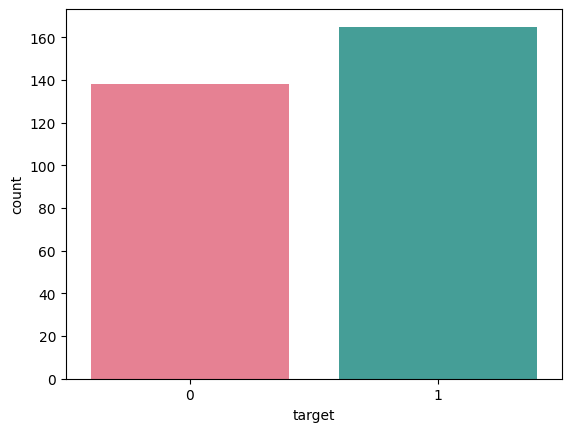

In [ ]:
sns.countplot(x = "target", data= df,palette = "husl")

In [ ]:
plt.show()

creating a seperate dataframe for dependent and independent

In [ ]:
x=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:, -1])

In [ ]:
x.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


splitting of the data in test train datasets


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
print(f" the shape of x_train:{x_train.shape}")

print("x"*30)
print(f" the shape of x_test:{x_test.shape}")
print("x"*30)
print(f" the shape of y_train:{y_train.shape}")
print("x"*30)
print(f" the shape of y_test:{y_test.shape}")

 the shape of x_train:(242, 13)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 the shape of x_test:(61, 13)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 the shape of y_train:(242, 1)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
 the shape of y_test:(61, 1)


call the model selection

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()


fit the train data


In [ ]:
logmodel.fit(x_train,y_train)

LogisticRegression()

predicting with the help of data.

In [ ]:
y_pred=logmodel.predict(x_test)


In [ ]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
y_test

,target
204,0
159,1
219,0
174,0
184,0
...,...
0,1
288,0
259,0
179,0


In [ ]:
y_test

,target
204,0
159,1
219,0
174,0
184,0
...,...
0,1
288,0
259,0
179,0


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[20 10]
 [ 4 27]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [ ]:
logmodel.predict(x_test)


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

this will show the probabilites ..

In [ ]:
probs=logmodel.predict_proba(x_test)
print(probs)

[[0.9963419  0.0036581 ]
 [0.26211622 0.73788378]
 [0.93948298 0.06051702]
 [0.99375336 0.00624664]
 [0.97651513 0.02348487]
 [0.99637709 0.00362291]
 [0.99230206 0.00769794]
 [0.37571309 0.62428691]
 [0.99588524 0.00411476]
 [0.01269474 0.98730526]
 [0.62109233 0.37890767]
 [0.90388892 0.09611108]
 [0.21718057 0.78281943]
 [0.70084087 0.29915913]
 [0.74958657 0.25041343]
 [0.05230938 0.94769062]
 [0.01272566 0.98727434]
 [0.98365233 0.01634767]
 [0.4862659  0.5137341 ]
 [0.17552059 0.82447941]
 [0.01910638 0.98089362]
 [0.98084393 0.01915607]
 [0.24935576 0.75064424]
 [0.02182735 0.97817265]
 [0.01738047 0.98261953]
 [0.23040169 0.76959831]
 [0.99620022 0.00379978]
 [0.01449798 0.98550202]
 [0.12668389 0.87331611]
 [0.00767206 0.99232794]
 [0.0497438  0.9502562 ]
 [0.11424961 0.88575039]
 [0.27462945 0.72537055]
 [0.20615693 0.79384307]
 [0.96714717 0.03285283]
 [0.48383493 0.51616507]
 [0.90401852 0.09598148]
 [0.68226726 0.31773274]
 [0.40151585 0.59848415]
 [0.96081431 0.03918569]


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,probs[:,1])


In [ ]:
fpr


array([0.        , 0.        , 0.        , 0.06666667, 0.06666667,
       0.1       , 0.1       , 0.16666667, 0.16666667, 0.2       ,
       0.2       , 0.23333333, 0.23333333, 0.26666667, 0.26666667,
       0.3       , 0.3       , 0.33333333, 0.33333333, 0.46666667,
       0.46666667, 0.5       , 0.5       , 0.53333333, 0.53333333,
       1.        ])

In [ ]:
tpr

array([0.        , 0.03225806, 0.41935484, 0.41935484, 0.4516129 ,
       0.4516129 , 0.51612903, 0.51612903, 0.5483871 , 0.5483871 ,
       0.61290323, 0.61290323, 0.64516129, 0.64516129, 0.67741935,
       0.67741935, 0.80645161, 0.80645161, 0.90322581, 0.90322581,
       0.93548387, 0.93548387, 0.96774194, 0.96774194, 1.        ,
       1.        ])

Text(0.5, 1.0, 'ROC')

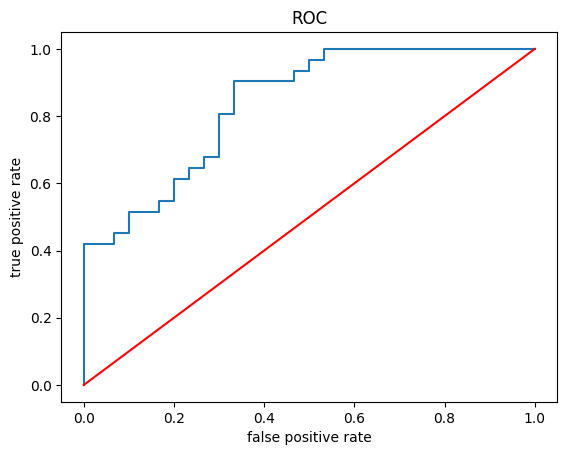

In [ ]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"red")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC")

In [ ]:
roc_auc_score(y_test,y_pred)

np.float64(0.7688172043010754)